In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

import utils

In [2]:
SEED = 42

In [3]:
x, y = utils.load_linear_data()

In [4]:
x_b = np.c_[np.ones((100, 1)), x]
m = len(x)
theta_best, residuals, rank, s = np.linalg.lstsq(x_b, y, rcond=1e-6)

In [5]:
def plot_history(history):
    utils.plot_xy(x, y)
    x_new = np.array([[0], [2]])
    x_new_b = np.c_[np.ones((2, 1)), x_new]
    for idx, theta in enumerate(history):
        y_new_pred = x_new_b.dot(theta)
        plt.plot(x_new, y_new_pred, 'b-')
    y_new_pred = x_new_b.dot(theta_best)
    plt.plot(x_new, y_new_pred, 'r-')
    plt.axis([0, 2, 0, 15])

## Batch gradient descent

theta = [[4.21509616]
 [2.77011339]]


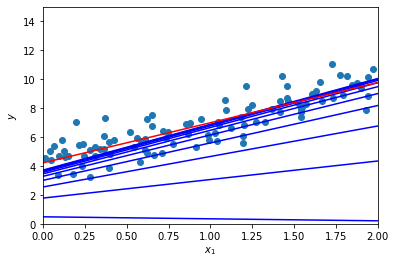

In [6]:
np.random.seed(SEED)

lr = 0.1
num_iters = 1000
theta = np.random.randn(2,1)
bgd_history = [theta]

for i in range(num_iters):
    gradients = 2 / m * x_b.T.dot(x_b.dot(theta) - y)
    theta = theta - lr * gradients
    bgd_history.append(theta)
    
print(f"theta = {theta}")

plot_history(bgd_history[:10])

## Stochastic gradient descent

theta = [[4.21076011]
 [2.74856079]]


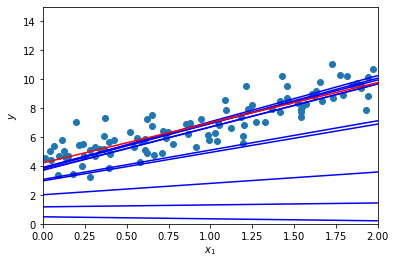

In [7]:
np.random.seed(SEED)

num_epochs = 50

def learning_schedule(t):
    return 5 / (t + 50)

theta = np.random.randn(2,1)
sgd_history = [theta]

for epoch in range(num_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = x_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        lr = learning_schedule(epoch * m + i)
        theta = theta - lr * gradients
        sgd_history.append(theta)
        
print(f"theta = {theta}")

plot_history(sgd_history[:10])

## Mini-batch gradient descent

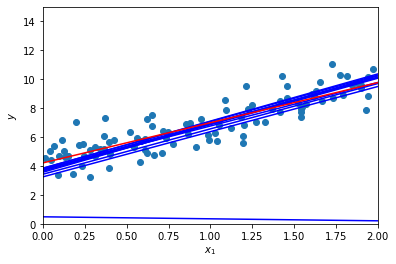

In [8]:
np.random.seed(SEED)

num_epochs = 1000
batch_size = 20

theta = np.random.randn(2, 1)
mgd_history = [theta]

def learning_schedule(t):
    return 200 / (t + 1000)

t = 0
for epoch in range(num_epochs):
    shuffled_indices = np.random.permutation(m)
    x_b_shuffled, y_shuffled = x_b[shuffled_indices], y[shuffled_indices]
    for i in range(0, m, batch_size):
        t += 1
        x_batch = x_b_shuffled[i:i+batch_size]
        y_batch = y_shuffled[i:i+batch_size]
        gradients = 2 / batch_size * x_batch.T.dot(x_batch.dot(theta) - y_batch)
        lr = learning_schedule(t)
        theta = theta - lr * gradients
        mgd_history.append(theta)
        
plot_history(mgd_history[:10])

In [9]:
mgd_history = np.squeeze(np.array(mgd_history))
sgd_history = np.squeeze(np.array(sgd_history))
bgd_history = np.squeeze(np.array(bgd_history))

In [10]:
mgd_history.shape

(5001, 2)

In [11]:
mgd_history[1, 1]

3.1158374814742005

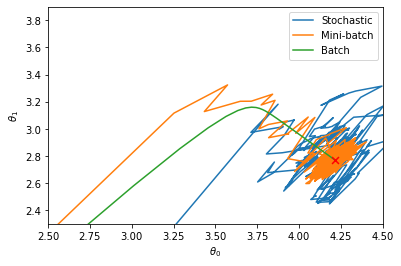

In [12]:
plt.figure()
plt.plot(sgd_history[:, 0], sgd_history[:, 1], label='Stochastic')
plt.plot(mgd_history[:, 0], mgd_history[:, 1], label='Mini-batch')
plt.plot(bgd_history[:, 0], bgd_history[:, 1], label='Batch')
plt.scatter(theta_best[0, 0], theta_best[1, 0], s=48, c='r', marker='x', zorder=3)
plt.xlabel(r"$\theta_0$")
plt.ylabel(r"$\theta_1$")
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.legend()
plt.show()